In [26]:

import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.linear_model import LogisticRegression  
from sklearn.pipeline import Pipeline  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score  

import warnings  
warnings.filterwarnings("ignore")



In [27]:
 # Step 2 – Load and Explore Dataset
 df = pd.read_csv("email.csv")
 print("Shape:", df.shape)
 print("Columns:", df.columns.tolist())
 df.head()

Shape: (5573, 2)
Columns: ['Category', 'Message']


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64


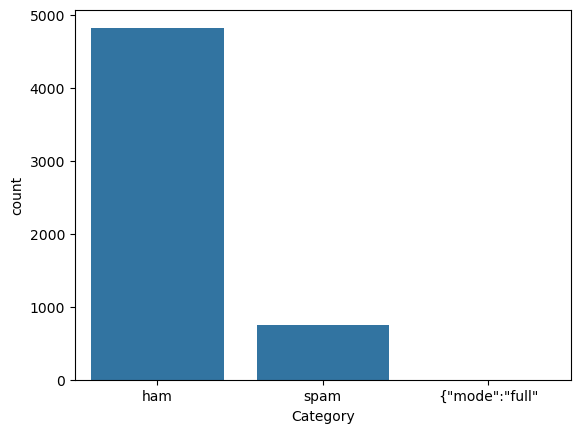

In [28]:
 # Step 3 – Check Target Distribution
 print(df['Category'].value_counts())
 sns.countplot(x='Category', data=df)
 plt.show()

  From the bar plots we see that the dataset are imbalanced.
  bar plot show that approximtely 86% of data are ham and 14% are spam.
  so it can effect by Model effect spacialy by recall for spam Detection.

In [29]:
# python

y = df['Category'].map({'ham': 0, 'spam': 1})

# Drop rows where mapping failed (NaN)
mask = y.notna()
X = df['Message'][mask]
y = y[mask].astype(int)


In [30]:
from sklearn.model_selection import train_test_split

# X and y should already be defined earlier
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)




In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

vectorizer



TfidfVectorizer(stop_words='english')

In [32]:
# Step 2: Fit the model
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_vec, y_train)  # ✅ MUST RUN SUCCESSFULLY


LogisticRegression(random_state=42)

In [33]:
# Define features and labels from your DataFrame (df)
X = df['Message']  # or the column containing the email text
y = df['Category'].map({'ham': 0, 'spam': 1})  # convert labels to numeric

# Drop rows with missing values
mask = y.notna()
X = X[mask]
y = y[mask]



In [34]:
from sklearn.model_selection import train_test_split

# Assume X and y are already prepared
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [35]:
y_pred = classifier.predict(X_test_vec)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Confusion Matrix:
 [[966   0]
 [ 37 112]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       966
         1.0       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Accuracy Score: 0.9668161434977578


# Interpretation of confusion matrix
Model correctly Predect 966 emails are ham and 112 emails are spam. there is no ham emails to predect spam.
and there is 37 spam emails predect ham. 

# interpretation of classification Report
# precision 
The precision of spam is 1 it means perfectly classify spam emails and precision of ham 0.96 means 96% 
its means ham emails are classified with 96% precision.
# Recall Interpretation 
Recall spam=0.75 its means 75% of spam  emails are detected by Model and Missed 25%.
Recall ham=1.0 its mean 100% ham emails is Detected by the Model. 
# F1 score 
F1 is 86% it show that the overall spam would detected if We improved Recall 14%.





# Accuecy score
Accuracy score 0.96 means 96% its show the overall performance of the model. Our Model classified the emails with 96% accuracy.